# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# !pip install matplotlib

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import os
import os

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=150)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=150)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 110


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_data = []
for city in cities:
    try:
        query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
        city_weather = requests.get(query_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
        
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping...: {e}")
        # pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


City not found. Skipping...: 'coord'
City not found. Skipping...: 'coord'
City not found. Skipping...: 'coord'
City not found. Skipping...: 'coord'
City not found. Skipping...: 'coord'
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          105
Lat           105
Lng           105
Max Temp      105
Humidity      105
Cloudiness    105
Wind Speed    105
Country       105
Date          105
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tindouf,27.6711,-8.1474,25.25,18,0,3.09,DZ,1731147867
1,al hudaydah,14.7978,42.9545,30.89,60,100,5.95,YE,1731147868
2,ushuaia,-54.8000,-68.3000,4.81,75,75,2.57,AR,1731147869
3,isafjordur,66.0755,-23.1240,10.02,57,100,3.60,IS,1731147870
4,adamstown,-25.0660,-130.1015,22.63,90,100,6.02,PN,1731147872


In [11]:
# output_dir did not exist.
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tindouf,27.6711,-8.1474,25.25,18,0,3.09,DZ,1731147867
1,al hudaydah,14.7978,42.9545,30.89,60,100,5.95,YE,1731147868
2,ushuaia,-54.8000,-68.3000,4.81,75,75,2.57,AR,1731147869
3,isafjordur,66.0755,-23.1240,10.02,57,100,3.60,IS,1731147870
4,adamstown,-25.0660,-130.1015,22.63,90,100,6.02,PN,1731147872


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

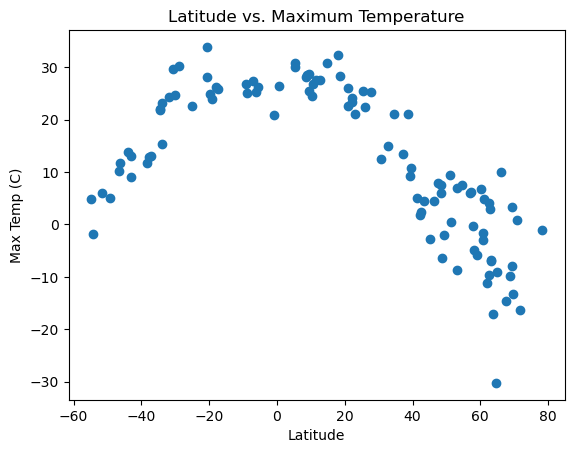

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Maximum Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

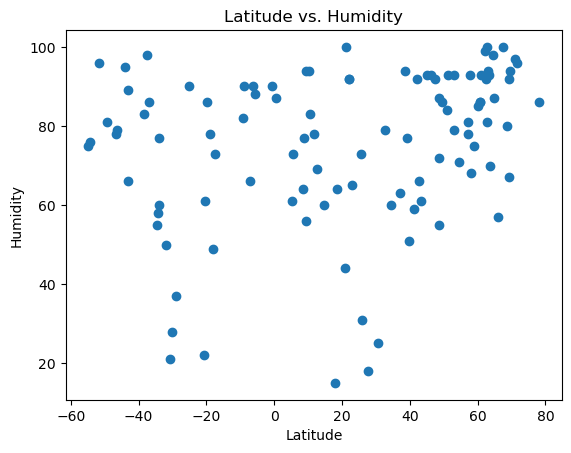

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

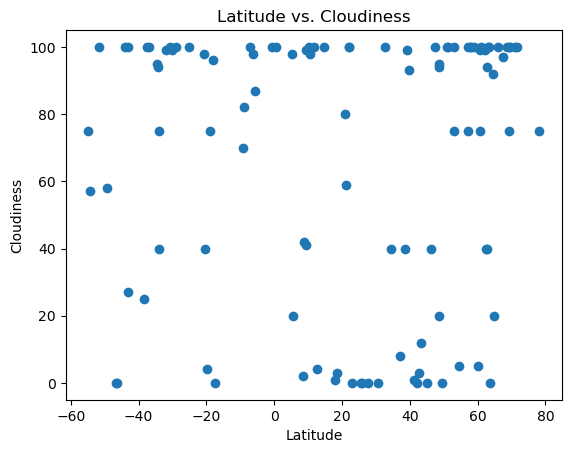

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

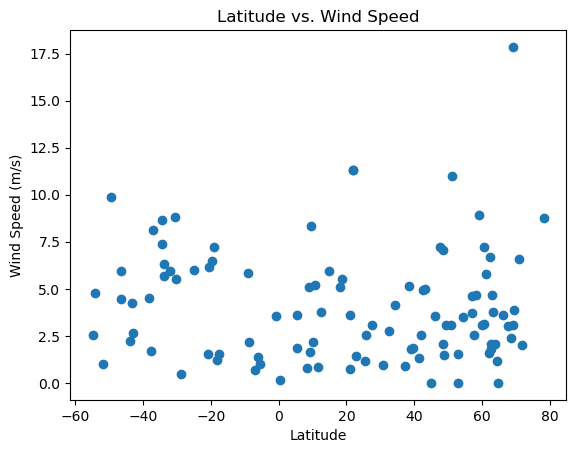

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [184]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title, ylabel):
    # Reshape the data
    x = x.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(x, y)

    y_pred = model.predict(x)

    r_value = linregress(x.flatten(), y.flatten()).rvalue
    r_squared = r_value ** 2
    
    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, y_pred, color='red', label='Regression Line')

    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    plt.annotate(line_eq, (x.min(), y.max()), fontsize=12, color="red")
    
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.legend()

    plt.text(0.00, 1.08, f"The r²-value is {r_squared}", fontsize=12, color="black", transform=plt.gca().transAxes)
    
    plt.show()

In [186]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tindouf,27.6711,-8.1474,25.25,18,0,3.09,DZ,1731147867
1,al hudaydah,14.7978,42.9545,30.89,60,100,5.95,YE,1731147868
3,isafjordur,66.0755,-23.1240,10.02,57,100,3.60,IS,1731147870
7,svetlyy yar,48.4748,44.7810,7.44,72,94,2.07,RU,1731147875
9,vorgashor,67.5833,63.9500,-14.68,100,97,3.03,RU,1731147615


In [188]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,4.81,75,75,2.57,AR,1731147869
4,adamstown,-25.0660,-130.1015,22.63,90,100,6.02,PN,1731147872
5,waitangi,-43.9535,-176.5597,13.79,95,100,2.24,NZ,1731147873
6,margaret river,-33.9500,115.0667,15.27,60,40,6.33,AU,1731147874
8,papatowai,-46.5619,169.4708,10.27,78,0,5.92,NZ,1731147877


###  Temperature vs. Latitude Linear Regression Plot

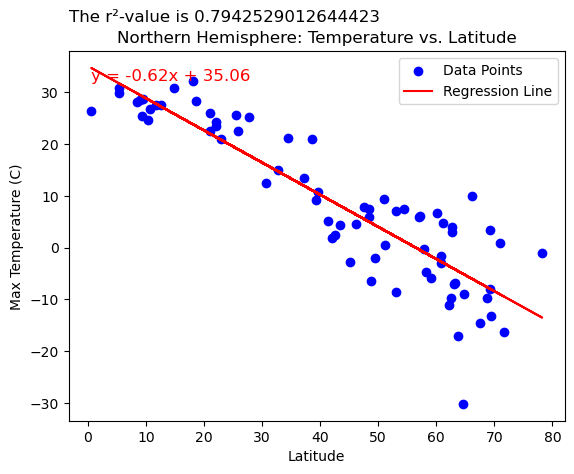

In [191]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern Hemisphere: Temperature vs. Latitude", "Max Temperature (C)")

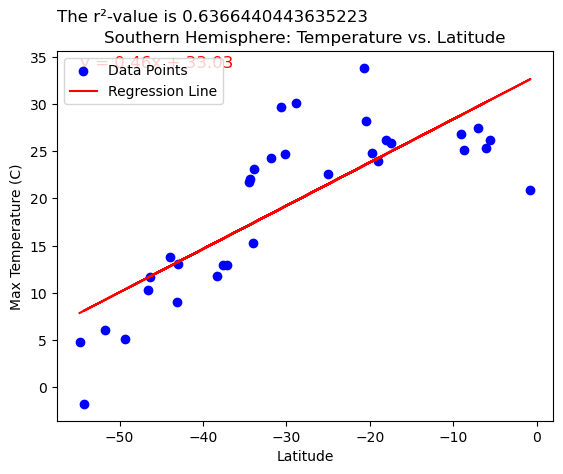

In [193]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern Hemisphere: Temperature vs. Latitude", "Max Temperature (C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

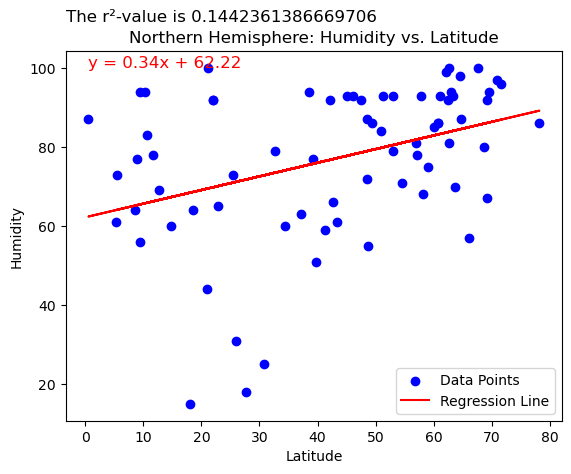

In [197]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Northern Hemisphere: Humidity vs. Latitude", "Humidity")

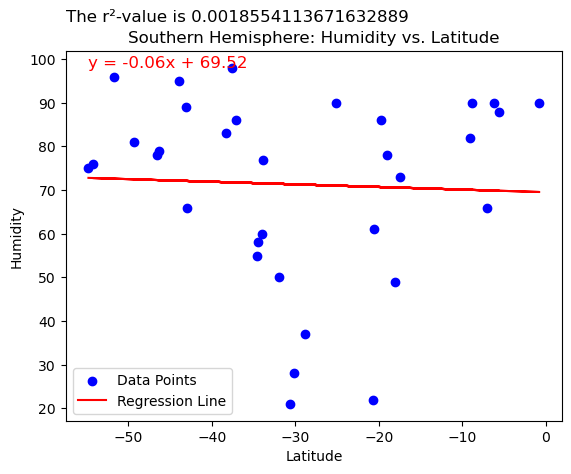

In [199]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Southern Hemisphere: Humidity vs. Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

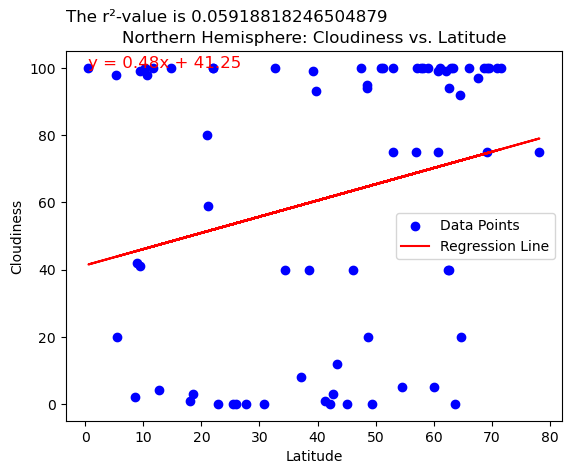

In [203]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern Hemisphere: Cloudiness vs. Latitude", "Cloudiness")

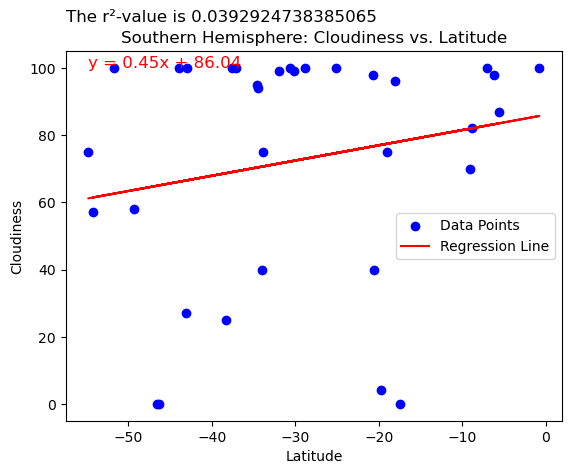

In [205]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Southern Hemisphere: Cloudiness vs. Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

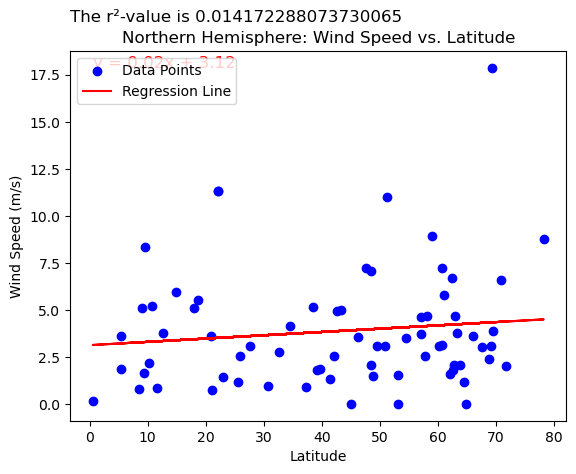

In [209]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern Hemisphere: Wind Speed vs. Latitude", "Wind Speed (m/s)")

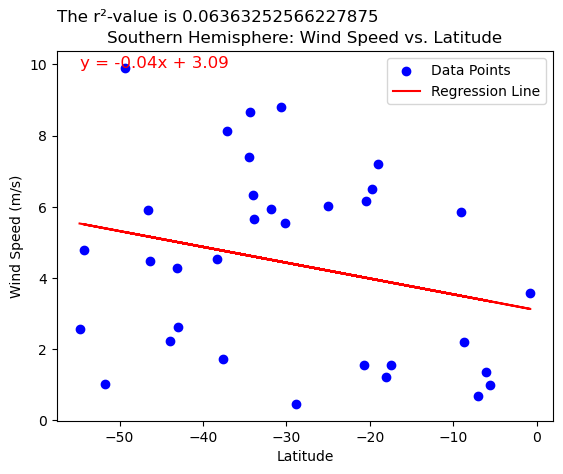

In [211]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Southern Hemisphere: Wind Speed vs. Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE